In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.image as mpimg

In [ ]:
def plot4GrayImages(img1, img2, img3, img4, titleImg1 = "", titleImg2 = "", titleImg3 = "", titleImg4 = ""):
    plt.subplots(figsize=(24, 14))
    plt.subplot(141), plt.imshow(img1, cmap='gray'),plt.title(titleImg1)

    plt.subplot(142), plt.imshow(img2, cmap='gray'),plt.title(titleImg2)

    plt.subplot(143), plt.imshow(img3, cmap='gray'),plt.title(titleImg3)

    plt.subplot(144), plt.imshow(img4, cmap='gray'),plt.title(titleImg4)

    plt.show()

def plot3GrayImages(img1, img2, img3, titleImg1 = "", titleImg2 = "", titleImg3 = ""):
    plt.subplots(figsize=(24, 14))
    plt.subplot(131), plt.imshow(img1, cmap='gray'),plt.title(titleImg1)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(img2, cmap='gray'),plt.title(titleImg2)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(img3, cmap='gray'),plt.title(titleImg3)
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plot2Images(img1, img2, titleImg1 = "", titleImg2 = ""):
    plt.subplots(figsize=(24, 14))
    plt.subplot(131), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)),plt.title(titleImg1)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)),plt.title(titleImg2)
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plot3Images(img1, img2, img3, titleImg1 = "", titleImg2 = "", titleImg3 = ""):
    plt.subplots(figsize=(24, 14))
    plt.subplot(131), plt.imshow(img1),plt.title(titleImg1)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(img2),plt.title(titleImg2)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(img3),plt.title(titleImg3)
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plot4Images(img1, img2, img3, img4, titleImages = np.full(4, " ")):
    plt.subplots(figsize=(16, 14))
    plt.subplot(221), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)),plt.title(titleImages[0])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(222), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)),plt.title(titleImages[1])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(223), plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB)),plt.title(titleImages[2])
    #plt.xticks([]), plt.yticks([])
    plt.subplot(224), plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB)),plt.title(titleImages[3])
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plotImage(img, title=""):
    plt.subplots(figsize=(15, 10))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title(title)
    #plt.xticks([]), plt.yticks([])
    plt.show()

Carregar a imagem "chips.png".

Calcular o gradiente e mostrar uma imagem com os vetores sobrepostos à imagem "chips.png", utilizando a função 'quiver'.

Obter a magnitude do gradiente e limiarizá-la.

Obter as bordas dos discos utilizando o algoritmo 'canny'.

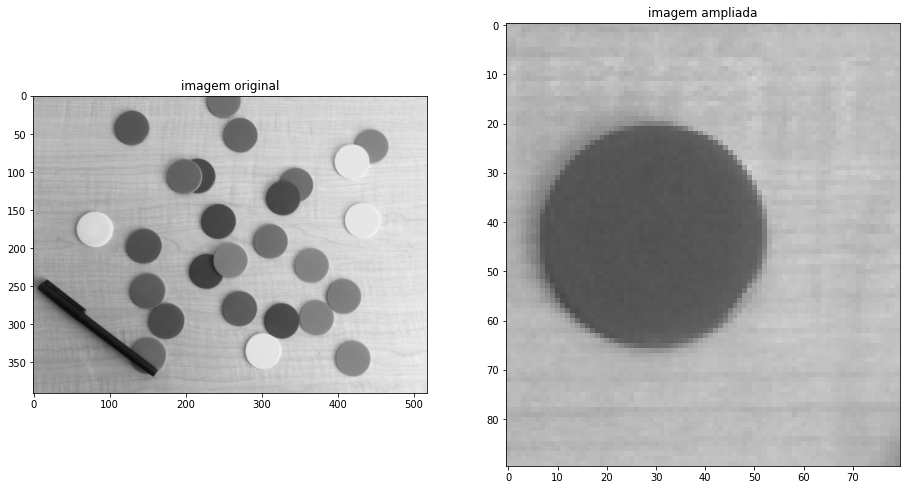

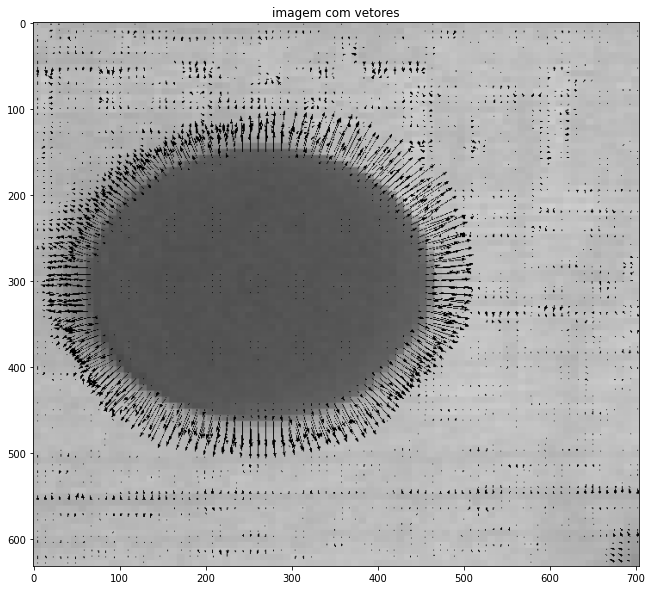

In [ ]:
def quiverPlotOverImage(img, imgSobelx, imgSobely):

    # plot dos vetores usando a função quiver e guardando em um png
    x_pos = np.arange(img.shape[1])
    y_pos = np.arange(img.shape[0])

    X, Y = np.meshgrid(x_pos, y_pos)

    fig = plt.figure(figsize=(11, 10))
    plt.quiver(X, Y, imgSobelx, imgSobely)
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()

    plt.savefig('vetores.png', bbox_inches='tight')
    plt.close(fig)

    # recuperando a imagem do plot anterior para sobrepor a imagem
    imgVectors = cv.imread('vetores.png', 0)

    # fazendo um flip no eixo y(por conta que o matplotlib inverteu o eixo y)
    imgVectors = imgVectors[::-1, :]

    # crop da imagem dos vetores (fiz uma estimativa de quanto precisaria cortar para remover a "margem" do plot)
    width, height = (imgVectors.shape[1], imgVectors.shape[0])
    imgVectors = imgVectors[40:height-40, 40:width-40]

    # fazendo um resize da imagem para a mesma dimensão do plot
    imgResized = cv.resize(img, (imgVectors.shape[1], imgVectors.shape[0]), interpolation = cv.INTER_AREA)

    # sobrepondo imagens
    result = cv.bitwise_and(imgResized, imgResized, mask = imgVectors)

    return result

imgOriginal = cv.imread('chips.png', 0)
img = imgOriginal[0:90, 100:180]

plot2Images(imgOriginal, img, "imagem original", "imagem ampliada")

SobelGx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

SobelGy = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# precisa definir depth = cv.CV_64F por conta dos valores negativos
imgSobelx = cv.filter2D(img, cv.CV_64F, SobelGx)
imgSobely = cv.filter2D(img, cv.CV_64F, SobelGy)

# criando a imagem com os vetores sobrepostos à imagem
result = quiverPlotOverImage(img, imgSobelx, imgSobely)

plotImage(result, "imagem com vetores")

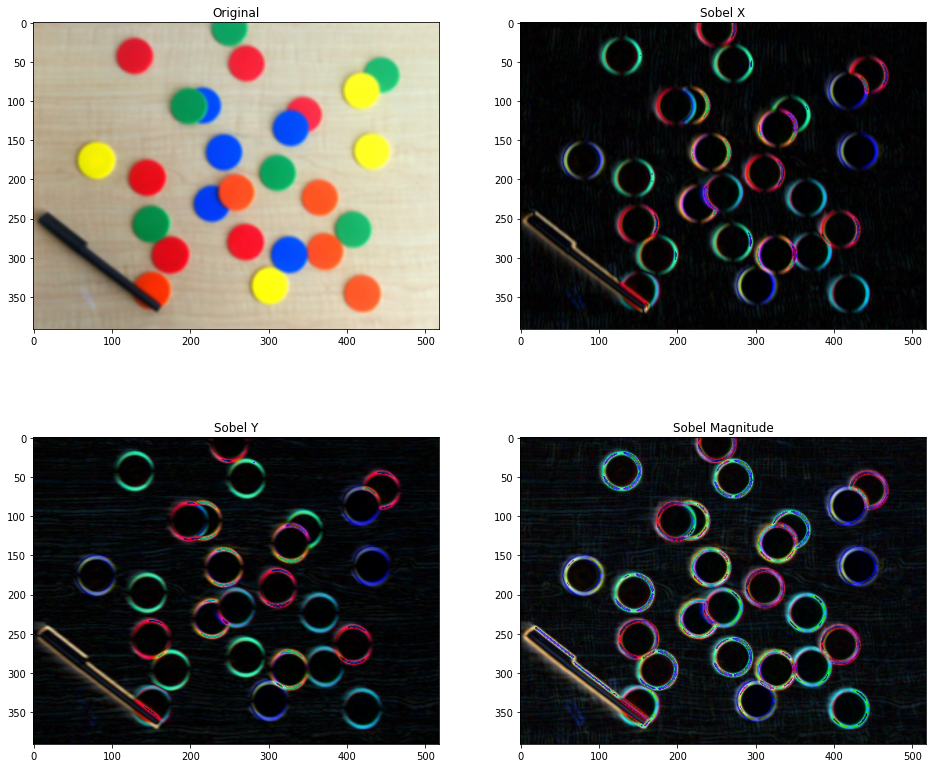

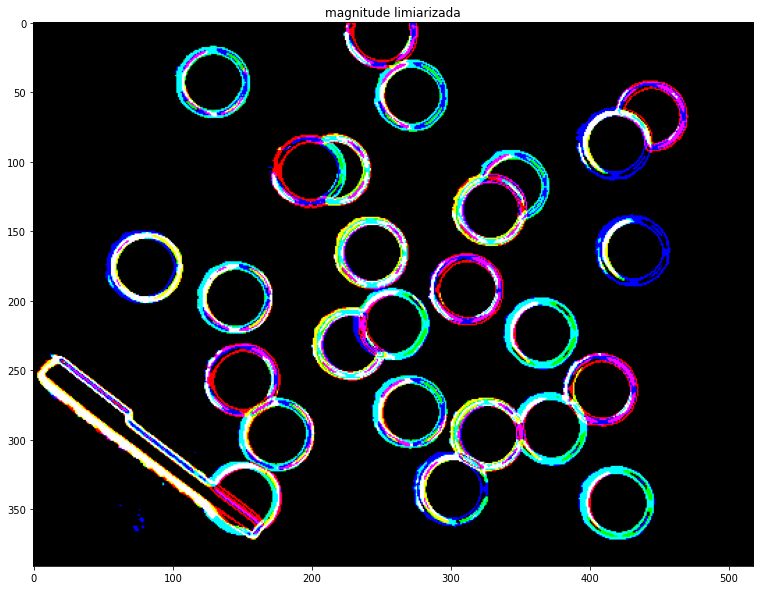

In [ ]:
# Obtendo magnitude limiarizada

img = cv.imread('chips.png')

img = cv.blur(img, (5, 5))

SobelGx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

SobelGy = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# precisa definir depth = cv.CV_64F por conta dos valores negativos
imgSobelx = cv.filter2D(img, cv.CV_64F, SobelGx)
imgSobely = cv.filter2D(img, cv.CV_64F, SobelGy)

#imgSobelMag = np.hypot(imgSobelx, imgSobely).astype(np.uint8)
imgSobelMag = (np.abs(imgSobelx) + np.abs(imgSobely)).astype(np.uint8)

imgSobelxAbs = np.abs(imgSobelx).astype(np.uint8)
imgSobelyAbs = np.abs(imgSobely).astype(np.uint8)

plot4Images(img, imgSobelxAbs, imgSobelyAbs, imgSobelMag, ["Original", "Sobel X", "Sobel Y", "Sobel Magnitude"])

_, imgThresh = cv.threshold(imgSobelMag, imgSobelMag.max()*0.33,255,cv.THRESH_BINARY)

plotImage(imgThresh, "magnitude limiarizada")

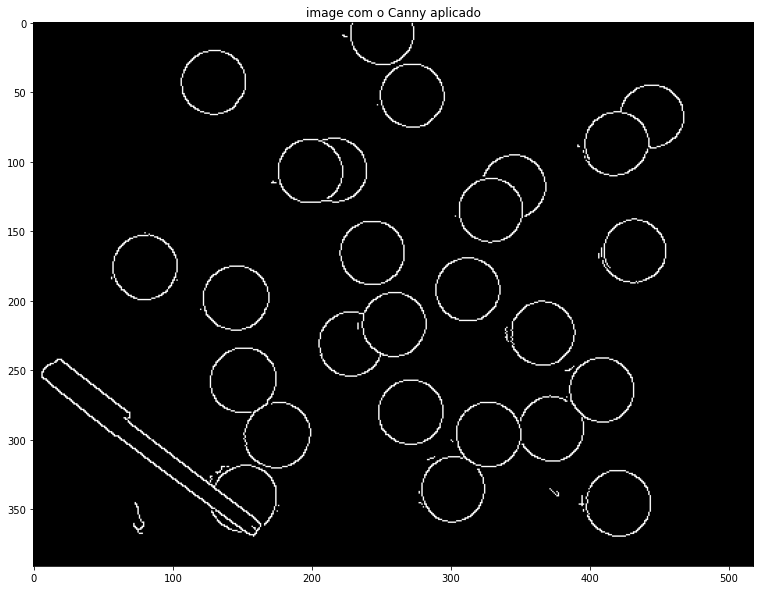

In [ ]:
# Aplicando Canny

img = cv.imread('chips.png')
imgCanny = cv.Canny(img, 100, 200)

plotImage(imgCanny, "image com o Canny aplicado")